### ML: Classification

Predicted: class of iris plant

<br>

A. Dataset Exploration

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("data/bezdekIris.data", names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


q1: distribution of classes in sample?
<br>a1: balanced dataset - 33% across all

In [3]:
df["class"].value_counts(normalize=True)

Iris-virginica     0.333333
Iris-setosa        0.333333
Iris-versicolor    0.333333
Name: class, dtype: float64

q2: any missing dataset?
<br>a2: none

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


q3: information on the numeric attributes?
<br> a3: need scaling

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


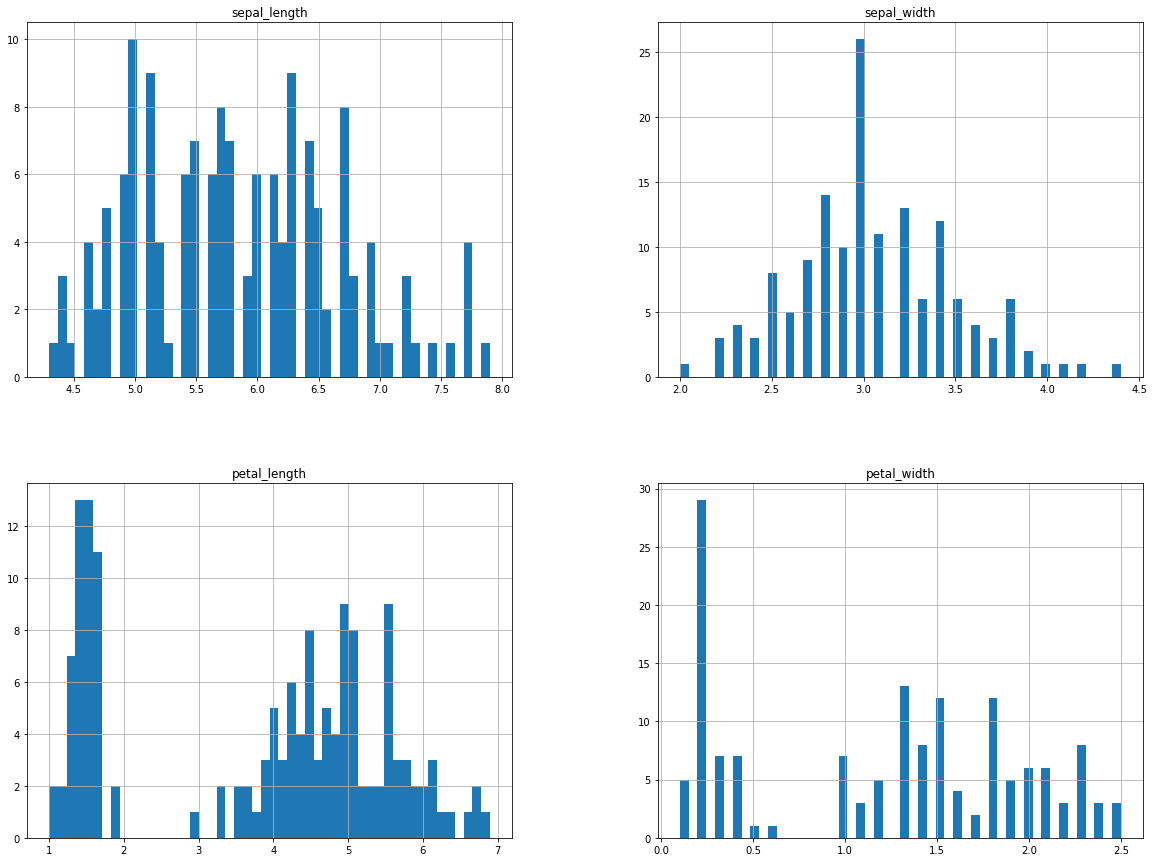

In [6]:
df.hist(bins=50, figsize=(20,15)) 
plt.show()

q4: correlations across attributes?
<br>a4: there's some pretty high correlation on sepal_length-petal_length, sepal_length-petal_width, petal_length-petal_width -> what to do with this though? does this mean I can opt to use 2 attributes only - petal_length and sepal_width?

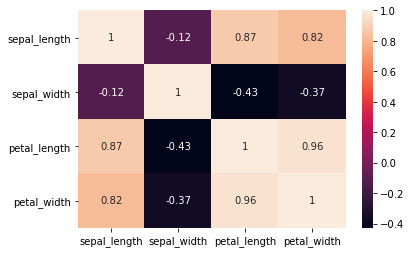

In [61]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

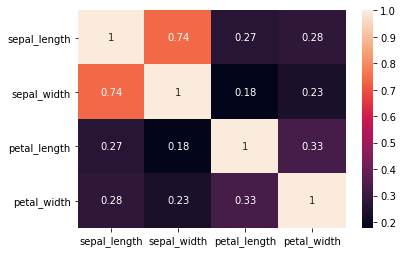

In [64]:
corrMatrix = df[df["class"]=="Iris-setosa"].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

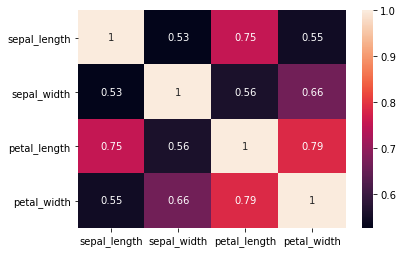

In [65]:
corrMatrix = df[df["class"]=="Iris-versicolor"].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

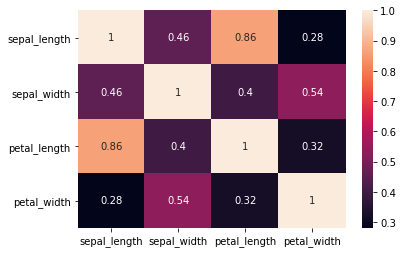

In [66]:
corrMatrix = df[df["class"]=="Iris-virginica"].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

B. Data Cleaning

C. Data Sampling

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

D. Model Training and Testing

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
y_train = train_set["class"].to_numpy()
y_train_encoded = LabelEncoder().fit_transform(y_train)
y_test = test_set["class"].to_numpy()
y_test_encoded = LabelEncoder().fit_transform(y_test)
X_train = train_set[["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()
X_test = test_set[["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()

In [11]:
# 1
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=200)
lr.fit(X_train, y_train_encoded)
y_pred_lr = lr.predict(X_test)

In [12]:
# 2
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train_encoded)
y_pred_nb = nb.predict(X_test)

In [13]:
# 3
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
sgd.fit(X_train, y_train_encoded)
y_pred_sgd = sgd.predict(X_test)

In [14]:
# 4
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train_encoded)
y_pred_knn = knn.predict(X_test)

In [15]:
# 5
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, random_state=101,
                               max_features=None, min_samples_leaf=15
                              )
dtree.fit(X_train, y_train_encoded)
y_pred_dtree = dtree.predict(X_test)

In [16]:
# 6
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(
    n_estimators=70, oob_score=True, n_jobs=-1,
    random_state=101, max_features=None, min_samples_leaf=30
                            )
rfm.fit(X_train, y_train_encoded)
y_pred_rfm = rfm.predict(X_test)

In [17]:
# 7
from sklearn.svm import SVC
svm = SVC(kernel="linear", C=0.025, random_state=101)
svm.fit(X_train, y_train_encoded)
y_pred_svm = svm.predict(X_test)

E. Model Assessment

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_test_encoded, y_pred_lr)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [20]:
confusion_matrix(y_test_encoded, y_pred_nb)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]])

In [21]:
confusion_matrix(y_test_encoded, y_pred_sgd)

array([[19,  0,  0],
       [ 2,  2,  9],
       [ 0,  0, 13]])

In [22]:
confusion_matrix(y_test_encoded, y_pred_knn)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [23]:
confusion_matrix(y_test_encoded, y_pred_dtree)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]])

In [24]:
confusion_matrix(y_test_encoded, y_pred_rfm)

array([[19,  0,  0],
       [ 3,  1,  9],
       [ 0,  0, 13]])

In [25]:
confusion_matrix(y_test_encoded, y_pred_svm)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

Note: I'm not entirely sure if I can do any tweaking with this dataset since it's too small. I guess I can do scaling and cross validation so that I can try those out

D. E. Model Training, Testing, Evaluation (with cross-validation)

In [26]:
from sklearn.model_selection import cross_val_score
from numpy import mean

In [27]:
# 1
m1 = cross_val_score(lr, X_train, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m1), min(m1), max(m1))

0.9619047619047618 0.9047619047619048 1.0


In [28]:
# 2
m2 = cross_val_score(nb, X_train, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m2), min(m2), max(m2))

0.9333333333333333 0.9047619047619048 1.0


In [29]:
# 3
m3 = cross_val_score(sgd, X_train, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m3), min(m3), max(m3))

0.780952380952381 0.6666666666666666 0.9047619047619048


In [30]:
# 4
m4 = cross_val_score(knn, X_train, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m4), min(m4), max(m4))

0.9333333333333333 0.8571428571428571 1.0


In [31]:
# 5
m5 = cross_val_score(dtree, X_train, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m5), min(m5), max(m5))

0.9142857142857144 0.8571428571428571 0.9523809523809523


In [32]:
# 6
m6 = cross_val_score(rfm, X_train, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m6), min(m6), max(m6))

0.3333333333333333 0.3333333333333333 0.3333333333333333


In [33]:
# 7
m7 = cross_val_score(svm, X_train, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m7), min(m7), max(m7))

0.9238095238095237 0.8571428571428571 1.0


Based on the cross validation and checking the accuracies, KNN is the best model but I think I need a better way to assess this. <br>Second and third best models are Logistic Regression and Naive Bayes, respectively.

Let's do some feature scaling.

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax_scaler = MinMaxScaler()
X_train_minmax_scaler = minmax_scaler.fit_transform(X_train)
standard_scaler = StandardScaler()
X_train_standard_scaler = standard_scaler.fit_transform(X_train)

In [35]:
# 1
m1 = cross_val_score(lr, X_train, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m1), min(m1), max(m1))

0.9619047619047618 0.9047619047619048 1.0


In [36]:
# 1
m1 = cross_val_score(lr, X_train_minmax_scaler, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m1), min(m1), max(m1))

0.9333333333333333 0.8571428571428571 1.0


In [37]:
# 1
m1 = cross_val_score(lr, X_train_standard_scaler, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m1), min(m1), max(m1))

0.9428571428571428 0.9047619047619048 1.0


In [38]:
# 2
m2 = cross_val_score(nb, X_train, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m2), min(m2), max(m2))

0.9333333333333333 0.9047619047619048 1.0


In [39]:
# 2
m2 = cross_val_score(nb, X_train_minmax_scaler, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m2), min(m2), max(m2))

0.9333333333333333 0.9047619047619048 1.0


In [40]:
# 2
m2 = cross_val_score(nb, X_train_standard_scaler, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m2), min(m2), max(m2))

0.9333333333333333 0.9047619047619048 1.0


In [41]:
# 4
m4 = cross_val_score(knn, X_train, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m4), min(m4), max(m4))

0.9333333333333333 0.8571428571428571 1.0


In [42]:
# 4
m4 = cross_val_score(knn, X_train_minmax_scaler, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m4), min(m4), max(m4))

0.9428571428571428 0.9047619047619048 1.0


In [43]:
# 4
m4 = cross_val_score(knn, X_train_standard_scaler, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m4), min(m4), max(m4))

0.8857142857142856 0.8095238095238095 1.0


Using the MinMax Scaler, Logistic regression performance went done. Naive Bayes stayed the same. KNN improved.
<br>Using the Standard Scaler, Logistic regression performance went done. Naive Bayes stayed the same. KNN performance went down.

How about we do some feature selection?

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax_scaler = MinMaxScaler()
X_train_minmax_scaler_3features = minmax_scaler.fit_transform(train_set[["sepal_length", "petal_width", "petal_length"]].to_numpy())
standard_scaler = StandardScaler()
X_train_standard_scaler_3features = standard_scaler.fit_transform(train_set[["sepal_length", "petal_width", "petal_length"]].to_numpy())

In [68]:
# 1
m1 = cross_val_score(lr, X_train, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m1), min(m1), max(m1))

0.9619047619047618 0.9047619047619048 1.0


In [69]:
# 1
m1 = cross_val_score(lr, X_train_minmax_scaler_3features, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m1), min(m1), max(m1))

0.9238095238095239 0.8095238095238095 1.0


In [70]:
# 1
m1 = cross_val_score(lr, X_train_standard_scaler_3features, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m1), min(m1), max(m1))

0.9333333333333333 0.8571428571428571 1.0


In [71]:
# 2
m2 = cross_val_score(nb, X_train, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m2), min(m2), max(m2))

0.9333333333333333 0.9047619047619048 1.0


In [72]:
# 2
m2 = cross_val_score(nb, X_train_minmax_scaler_3features, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m2), min(m2), max(m2))

0.9333333333333333 0.9047619047619048 1.0


In [73]:
# 2
m2 = cross_val_score(nb, X_train_standard_scaler_3features, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m2), min(m2), max(m2))

0.9333333333333333 0.9047619047619048 1.0


In [74]:
# 4
m4 = cross_val_score(knn, X_train, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m4), min(m4), max(m4))

0.9333333333333333 0.8571428571428571 1.0


In [75]:
# 4
m4 = cross_val_score(knn, X_train_minmax_scaler_3features, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m4), min(m4), max(m4))

0.9428571428571428 0.9047619047619048 1.0


In [76]:
# 4
m4 = cross_val_score(knn, X_train_standard_scaler_3features, y_train_encoded, cv=5, scoring="accuracy")
print(mean(m4), min(m4), max(m4))

0.9238095238095239 0.8571428571428571 1.0


Cutting down the features did not improve model performance.

None of what I thought will work to improve this worked :D

So far Logistic Regression without much data cleaning provides best numbers: average 96%, min 90%, max 100%.

In [85]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=3)
iris_trim = bestfeatures.fit_transform(X_train, y_train_encoded)
print(bestfeatures.scores_)
print(bestfeatures.pvalues_)
print(iris_trim.shape)

[ 74.7572012   33.41979913 713.45534904 526.54162416]
[1.02306435e-20 6.87731544e-12 1.08422812e-60 1.75926474e-54]
(105, 3)


In [81]:
train_set.head()

,sepal_length,sepal_width,petal_length,petal_width,class
81,5.5,2.4,3.7,1.0,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
75,6.6,3.0,4.4,1.4,Iris-versicolor
109,7.2,3.6,6.1,2.5,Iris-virginica


In [82]:
X_train

array([[5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2

Learnings:
<br> - picking features is not as simple as doing correlations
<br> - must read up
<br>
<br>References:
<br> - http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
<br> - https://www.datacamp.com/community/tutorials/feature-selection-python
<br> - https://machinelearningmastery.com/an-introduction-to-feature-selection/
<br> - https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/
<br> - https://chrisalbon.com/code/machine_learning/trees_and_forests/feature_selection_using_random_forest/
<br> - https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2
<br> - https://www.kaggle.com/ar2017/basics-of-feature-selection-with-python